In [1]:
import re
import json
import matplotlib.pyplot as plt
import codecs
import numpy as np
import jieba

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
    '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
    '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
    '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def load_nerDict(fname):
    nerDict, cnt = [], 0
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                cnt += 1
                # print(line)
                nerDict.append(line.strip())
            # if cnt == 2:
            #     break
    print(cnt)
    return nerDict

def get_new_ner(fname):
    ner = set()
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            entities = data['coreEntityEmotions']
            for a in entities:
                if len(a['entity']) < 9:
                    ner.add(a['entity'])
    return ner

def clean_text(text):
    for p in puncts:
        text = text.replace(p, ' ')
    return text

def load_train_data(train_file, ner_file):
    
    ner = get_new_ner(train_file)
    nerDict = load_nerDict(ner_file)
    
    for i in ner:
        if i not in nerDict:
            nerDict.append(i)
#     print(len(nerDict))
    
    #更新jieba的词库
    word_invalid = []
    for i in nerDict:
        try:
            jieba.add_word(i)
        except:
            word_invalid.append(i)
    
    content_word = []
    with open(train_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            text = clean_text(data['content'].strip())
            content = jieba.lcut(text)
            content = [ i.strip() for i in content]
            content_word.append(content)

    return nerDict, content_word, word_invalid

In [2]:
basedir = '../input_data'
train_file = basedir + '/coreEntityEmotion_train.txt' 
test_file = basedir + '/coreEntityEmotion_test_stage1.txt'
ner_file = basedir + '/nerDict.txt'
stop_words_file = basedir + '/stop_words_mine.txt'

nerDict, content_word, word_invalid = load_train_data(train_file, ner_file)
print(len(nerDict))
print(len(content_word))
print(len(word_invalid))

311284


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin\AppData\Local\Temp\jieba.cache
Loading model cost 0.849 seconds.
Prefix dict has been built succesfully.


321016
40000
0


['第十七届', '上海', '国际', '工业自动化', '及', '机器人', '展与', '上海', '智能工厂', '展览会', '于', '2019', '年', '3', '月', '1', '日', '圆满', '落下', '帷幕', '。', '展会', '展出', '规模', '907', '62', '平方米', '', '国内外', '参展', '厂商', '达', '1000', '多家', '', '并', '吸引', '超过', '100000', '名', '专业', '观众', '前来', '参观', '。', '此次', '展会', '全面', '展示', '了', '工业自动化', '技术', '', '工业', '装配', '与', '传输技术', '', '工业机器人', '整机', '与', '零部件', '', '机器视觉', '工业', '应用', '', 'agv', '无人', '搬运', '', '智慧工厂', '解决方案', '', '工业自动化', '全面', '解决方案', '等', '产品', '领域', '。', '无论是', '展会', '规模', '', '展示', '范围', '以及', '专业', '观众', '的', '人数', '', '都', '实现', '了', '快速', '的', '增长', '', '极大', '地', '推动', '了', '我国', '制造业', '的', '转型', '升级', '和', '跨越', '发展', '！', '誉洋', '3d', '机器视觉', '引', '发展', '会', '参观', '热潮', '在', '大连', '誉洋', '工业', '智能', '的', '展位', '', '机器人', '自动', '抓取', '物件', '让', '人', '眼前一亮', '。', '机器人', '在', '3d视觉', '的', '引导', '下', '精准定位', '杂乱无序', '的', '目标', '', '并', '实现', '准确', '快速', '抓取', '', '整个', '过程', '井然有序', '', '无需', '任何', '人工干预', '。', '誉洋', '现场', '工程师', '介绍', '', '制造', '企

(array([  3.,   3.,   3.,  15.,  85., 163., 173., 229., 237., 271., 254.,
        273., 250., 245., 252., 319., 311., 369., 386., 418., 496., 504.,
        474., 475., 448., 518., 515., 551., 556., 545., 563., 566., 512.,
        567., 580., 605., 572., 539., 539., 548., 480., 547., 515., 544.,
        572., 561., 594., 567., 472., 537., 503., 471., 494., 440., 446.,
        410., 394., 367., 399., 381., 361., 371., 307., 329., 311., 292.,
        297., 263., 247., 286., 260., 247., 204., 250., 236., 200., 196.,
        183., 191., 209., 172., 196., 170., 177., 176., 153., 169., 156.,
        134., 139., 135., 157., 138., 141., 120., 126., 118., 130., 123.,
        114., 104., 120., 133., 122., 116., 108., 124., 105., 102.,  90.,
        102.,  94.,  88.,  83., 110.,  77.,  92.,  96.,  82.,  96.,  58.,
         91.,  85.,  90.,  88., 107.,  75.,  72.,  66.,  56.,  72.,  66.,
         73.,  67.,  73.,  70.,  53.,  54.,  78.,  60.,  66.,  46.,  51.,
         53.,  46.,  54.,  51.,  50., 

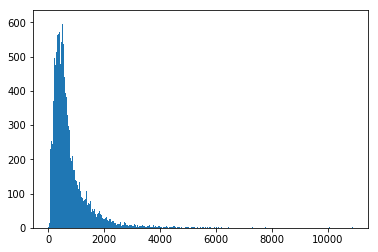

In [4]:
print(content_word[0])

content_word_len = [len(i) for i in content_word]

print("min:{}".format(np.min(content_word_len)))
print("max:{}".format(np.max(content_word_len)))
print("mean:{}".format(np.mean(content_word_len)))
print("median:{}".format(np.median(content_word_len)))
print("std:{}".format(np.std(content_word_len)))
plt.hist(content_word_len, bins=1000)

In [7]:
cnt = 0
for i in content_word:
    if len(content_word) > 10000:
        cnt += 1
print(cnt)

40000
